In [53]:
import matplotlib as mp
import numpy as np 
import random as rd
import math


import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d.axes3d import Axes3D



In [54]:
def f1(X, Y) :
    return sin(X/2.0) + cos(2.0 * Y)

def f2(X, Y) :
    return -abs(X-2) - abs((0.5*Y) + 1) + 3



In [55]:

def hillClimbing(func, coor, step) :
    sx = []
    sy = []
    sz = []
    current = coor
    count = 0
    while True :
        current_val = func(current[0], current[1])

        sx.append(current[0])
        sy.append(current[1])
        sz.append(current_val)
        
        b = False 
        
        neighbors = ((current[0] + step, current[1]), (current[0] + step, current[1] + step), (current[0] , current[1] + step), (current[0] - step, current[1]), 
                     (current[0], current[1]- step), (current[0] - step, current[1] - step), (current[0] + step, current[1]- step), (current[0] - step, current[1] + step))
        
        for z in neighbors :

            if (z[0] >= 0 and z[0] <= 10 and z[1] >= 0 and z[1] <= 10) :
            
                if (func(z[0], z[1]) > current_val) :
                    b = True 
                    current = z
                    current_val =func(z[0], z[1])
            
        if (b == False or count > 100000) :
            return (current[0], current[1], current_val, sx, sy, sz, count)
        count = count + 1
                    






In [56]:
steps = [0.01, 0.05, 0.1, 0.2]

samples = []
for k in range(100) :
    
    samples.append((rd.uniform(0,10), rd.uniform(0,10)))


valuesf1 = []
valuesf2 = []
for m in range(4) :
    valuesf1.append([])
    for s in samples :
        
        valuesf1[m].append(hillClimbing(f1, s, steps[m]))    
for m in range(4) :
    valuesf2.append([])
    for s in samples :
        
        valuesf2[m].append(hillClimbing(f2, s, steps[m]))    




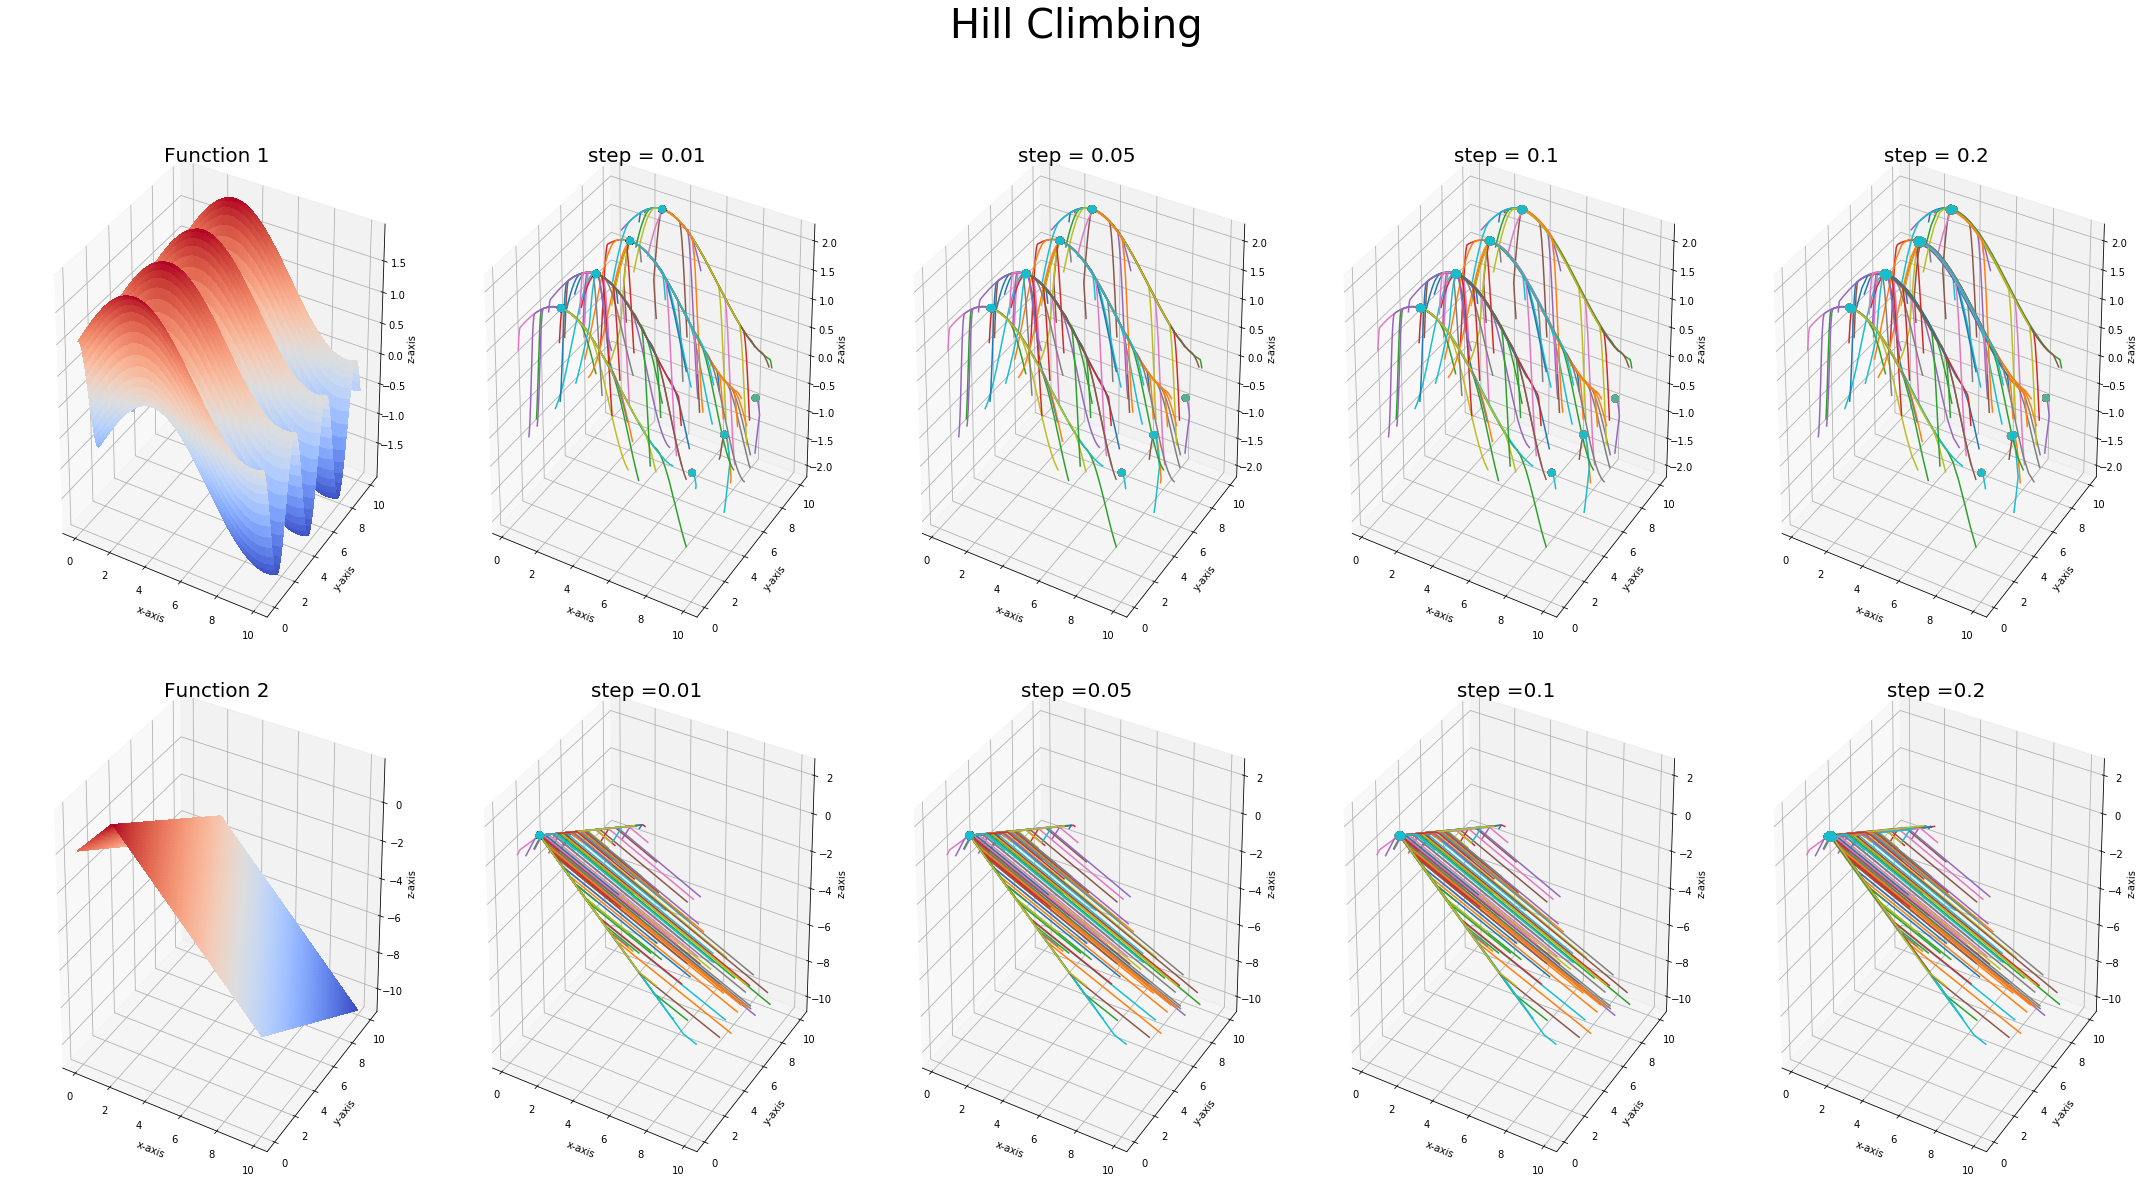

In [57]:
X = linspace(0, 10 , 100)

Y = linspace(0, 10 , 100)

X,Y = np.meshgrid(X,Y)

# function to be plotted



Z = f1(X, Y)

fig = plt.figure(figsize=(30,15))
fig.suptitle('Hill Climbing', fontsize=40, y = 1.1)
ax = fig.add_subplot(2, 5, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, cmap = cm.coolwarm,antialiased = False)
ax.set_title("Function 1", size = 20)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')




for o in range(4) :
    ax1 = fig.add_subplot(2, 5, o + 2, projection='3d')
    ax1.set_xlabel('x-axis')
    ax1.set_ylabel('y-axis')
    ax1.set_zlabel('z-axis')
    xx = []
    y = []
    z = []
    for t in valuesf1[o] :
        xx.append(t[0])
        y.append(t[1])
        z.append(t[2])
        ax1.plot(t[3], t[4],  t[5], label = 'paths')
        ax1.scatter(xx, y , z, s = 45, zdir = 'z', label = 'maximas')
    title = "step = "
    title = title + str(steps[o])
    ax1.set_title(title, size = 20)

Z = f2(X,Y)
ax2 = fig.add_subplot(2, 5, 6, projection='3d')
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, cmap = cm.coolwarm,antialiased = False)
ax2.set_title("Function 2", size = 20 )
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')
ax2.set_zlabel('z-axis')

for o in range(4) :
    ax1 = fig.add_subplot(2, 5, o + 2 + 5, projection='3d')
    ax1.set_xlabel('x-axis')
    ax1.set_ylabel('y-axis')
    ax1.set_zlabel('z-axis')
    xx = []
    y = []
    z = []
    for t in valuesf2[o] :
        xx.append(t[0])
        y.append(t[1])
        z.append(t[2])
        ax1.plot(t[3], t[4],  t[5], label = 'paths')
        ax1.scatter(xx, y , z, s = 45, zdir = 'z', label = 'maximas')
    title = "step ="
    title = title + str(steps[o])
    ax1.set_title(title, size=20)


fig.tight_layout()
plt.show()
fig.savefig("HilClimbing.pdf")

In [58]:
averagef1 = []
averagef2 = []
standard_devf1 = []
standard_devf2 = []

for i in range(4) :
    averagef1.append(0)
    averagef2.append(0)
    standard_devf1.append(0)
    standard_devf2.append(0)
    for j in valuesf1[i]:
        averagef1[i] = averagef1[i] + j[6]
    averagef1[i] = averagef1[i]/100.0
    for j in valuesf2[i]:
        averagef2[i] = averagef2[i] + j[6]
    averagef2[i] = averagef2[i]/100.0

    for j in valuesf1[i] :
        standard_devf1[i] = standard_devf1[i] + ((j[6] - averagef1[i]) * (j[6] - averagef1[i]))
    standard_devf1[i] = sqrt(standard_devf1[i]) / 100.0
    for j in valuesf2[i] :
        standard_devf2[i] = standard_devf2[i] + ((j[6] - averagef2[i]) * (j[6] - averagef2[i]))
    standard_devf2[i] = sqrt(standard_devf2[i]) / 100.0
print(" Average for f1 per steps size : " , averagef1)
print(" Standard deviation for f1 per steps size : ", standard_devf1)
print(" Average for f2 per steps size : ", averagef2)
print(" Standard deviation for f2 per steps size : ", standard_devf2)


 Average for f1 per steps size :  [279.27, 55.84, 27.94, 13.99]
 Standard deviation for f1 per steps size :  [17.237307533370753, 3.4451914315462937, 1.7267785034566534, 0.8608710704861676]
 Average for f2 per steps size :  [572.13, 114.16, 56.91, 28.3]
 Standard deviation for f2 per steps size :  [23.471449273532304, 4.687189349706283, 2.339875851407506, 1.1681181447096867]


In [59]:
def localBeam(func, k, step) :
    bestvalue = 0
    count = 0
    Kelements = []
    for i in range(k):
        x = rd.uniform(0,10)
        y = rd.uniform(0,10)
        Kelements.append((func(x,y), x, y))
    
    while True :
        count += 1
        listNeighbors = []
        
        for element in Kelements :
            isGoal = True
            neighbors = ((element[1] + step, element[2]), (element[1] + step, element[2] + step), (element[1] , element[2] + step), (element[1] - step, element[2]), 
                     (element[1], element[2]- step), (element[1] - step, element[2] - step), (element[1] + step, element[2]- step), (element[1] - step, element[2] + step))
        
        
            for nei in neighbors :
                elem = (func(nei[0], nei[1]), nei[0], nei[1])
                if (elem[1] >= 0 and elem[1] <= 10 and elem[2] >= 0 and elem[2] <= 10):
                    if elem[0] > element[0] :
                        isGoal = False 
                    listNeighbors.append(elem)
            if isGoal or count > 1000 :
                return (elem, count)
        Kelements = sorted((listNeighbors))[len(listNeighbors) - k -1:len(listNeighbors) -1]

In [60]:
K = [2, 4, 8, 16]
lbeam_resultsf1 = []
averagef1 = []
standard_devf1 = []

for k in K :
    
    value = []
    av = 0
    sd = 0
    
    for i in range(100) :
        x = localBeam(f1, k, 0.05)
        value.append(x)
        av += x[1]
    av = av/ 100.0
    averagef1.append(av)
    for j in value :
        sd += (j[1] - av) * (j[1] - av)
    sd = sqrt(sd)/100.0
    standard_devf1.append(sd)
    lbeam_resultsf1.append(value)

print(" Averge of steps for f1 per K-size (and step size 0.05): ", averagef1)
print(" Standard deviation of steps for f1 per K-size(and step size 0.05): ", standard_devf1)


lbeam_resultsf2 = []
averagef2 = []
standard_devf2 = []

for k in K :
    
    value = []
    av = 0
    sd = 0
    
    for i in range(100) :
        x = localBeam(f2, k, 0.05)
        value.append(x)
        av += x[1]
    av = av/ 100.0
    averagef2.append(av)
    for j in value :
        sd += (j[1] - av) * (j[1] - av)
    sd = sqrt(sd)/100.0
    standard_devf2.append(sd)
    lbeam_resultsf2.append(value)

print(" Averge of steps for f2 per K-size (and step size 0.05): ", averagef2)
print(" Standard deviation of steps for f1 per K-size(and step size 0.05): ", standard_devf2)

 Averge of steps for f1 per K-size (and step size 0.05):  [552.46, 40.34, 25.12, 17.94]
 Standard deviation of steps for f1 per K-size(and step size 0.05):  [47.67605986236699, 2.0361345731557137, 1.5750098412390952, 1.1274590901669117]
 Averge of steps for f2 per K-size (and step size 0.05):  [120.2, 85.26, 57.92, 37.83]
 Standard deviation of steps for f1 per K-size(and step size 0.05):  [6.58340337515483, 4.628533677094723, 3.5167223376320176, 2.253000443852597]


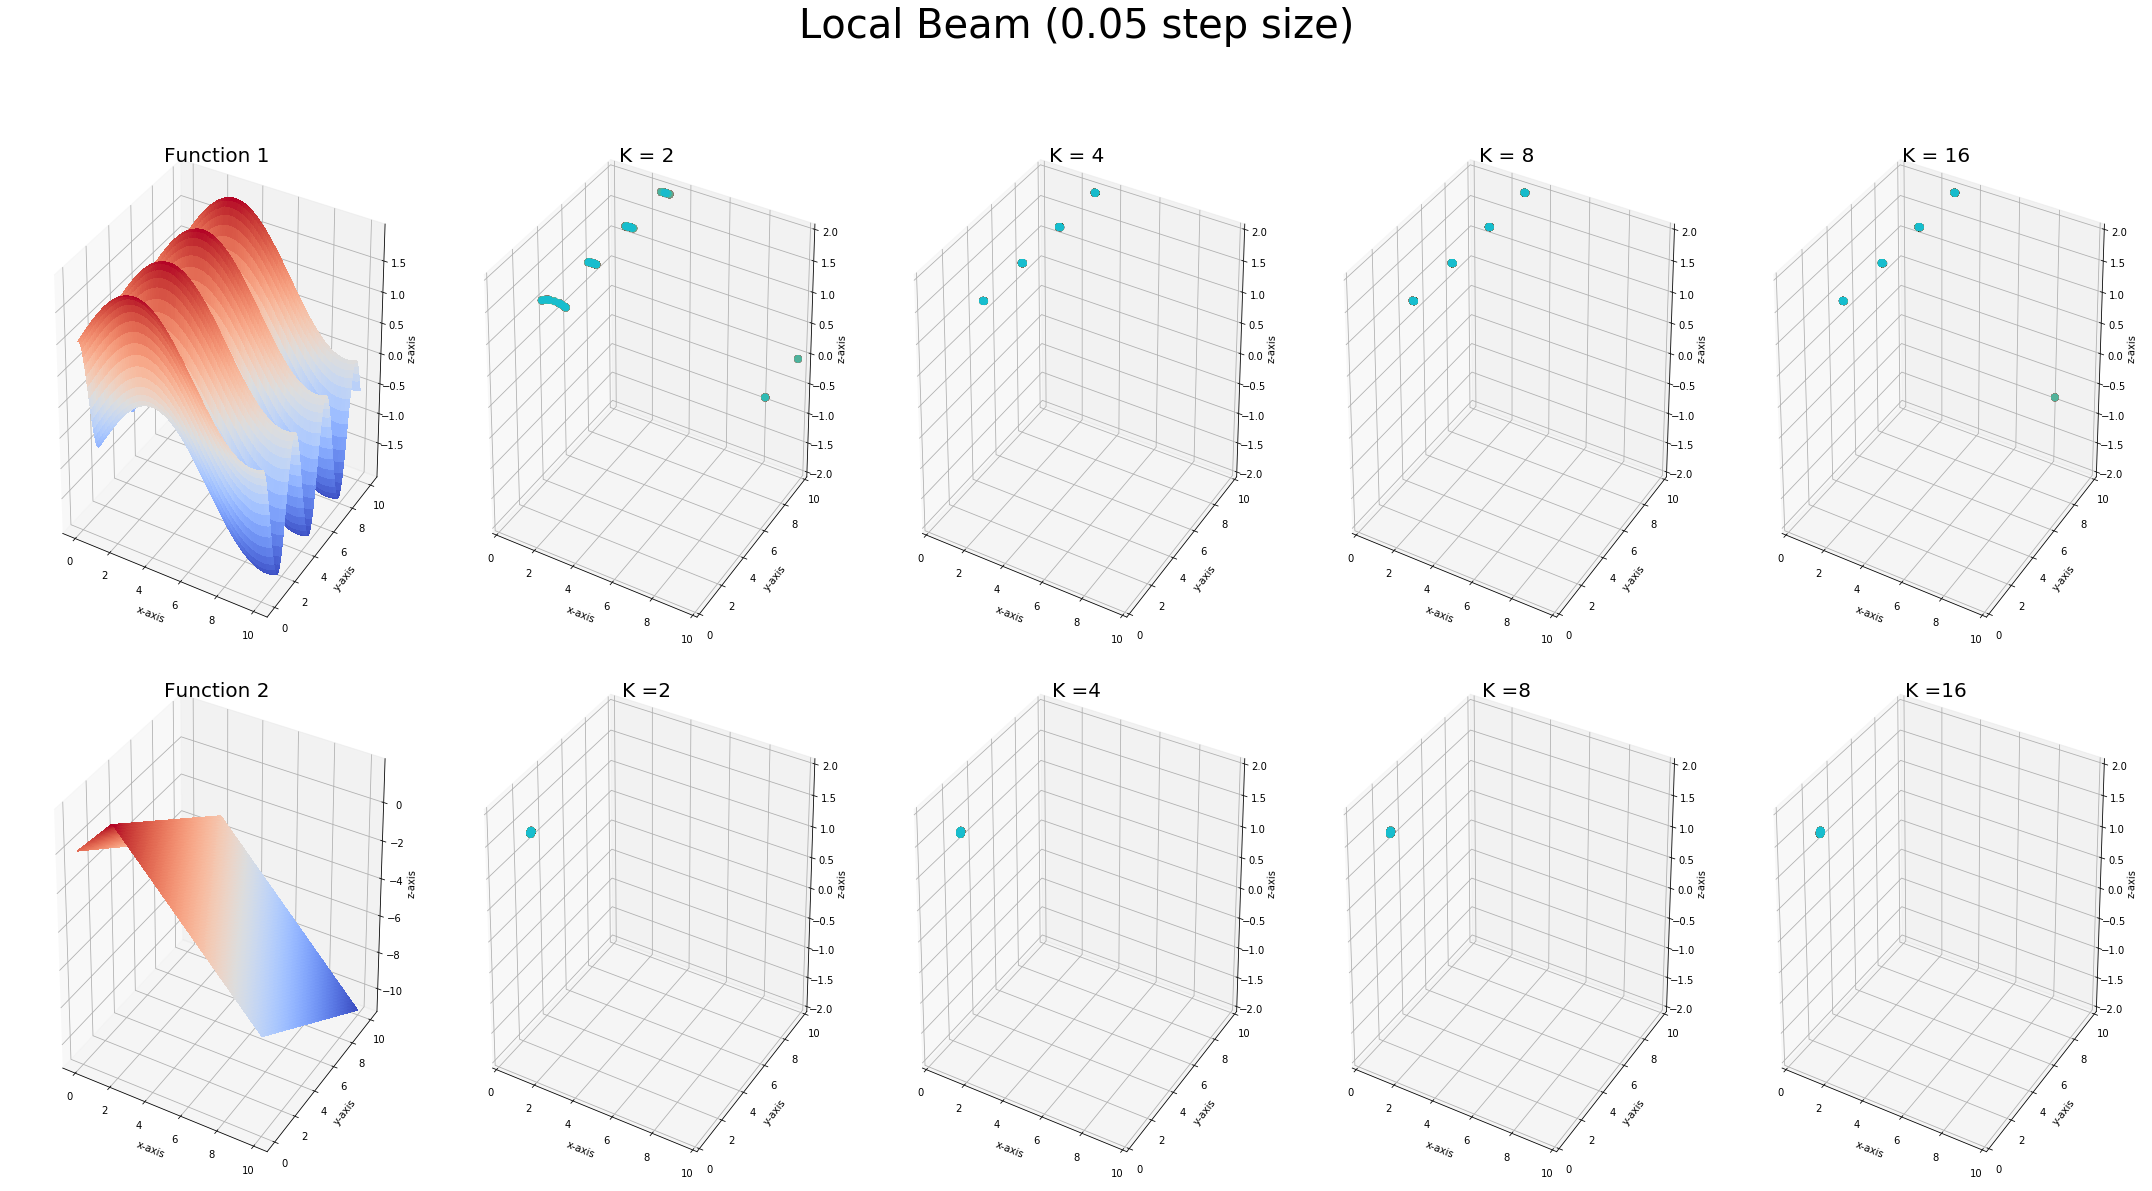

In [61]:
X = linspace(0, 10 , 100)

Y = linspace(0, 10 , 100)

X,Y = np.meshgrid(X,Y)

# function to be plotted



Z = f1(X, Y)

fig = plt.figure(figsize=(30,15))
fig.suptitle('Local Beam (0.05 step size)', fontsize=40, y = 1.1)
ax = fig.add_subplot(2, 5, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, cmap = cm.coolwarm,antialiased = False)
ax.set_title("Function 1", size = 20)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')




for o in range(4) :
    ax1 = fig.add_subplot(2, 5, o + 2, projection='3d')
    ax1.set_xlabel('x-axis')
    ax1.set_ylabel('y-axis')
    ax1.set_zlabel('z-axis')
    ax1.set_xlim([0,10])
    ax1.set_ylim([0,10])
    ax1.set_zlim([-2,2])
    xx = []
    y = []
    z = []
    for t in lbeam_resultsf1[o] :
        xx.append(t[0][1])
        y.append(t[0][2])
        z.append(t[0][0])
        
        ax1.scatter(xx, y , z, s = 45, zdir = 'z', label = 'maximas')
    title = "K = "
    title = title + str(K[o])
    ax1.set_title(title, size = 20)

Z = f2(X,Y)
ax2 = fig.add_subplot(2, 5, 6, projection='3d')
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, cmap = cm.coolwarm,antialiased = False)
ax2.set_title("Function 2", size = 20 )
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')
ax2.set_zlabel('z-axis')

for o in range(4) :
    ax1 = fig.add_subplot(2, 5, o + 2 + 5, projection='3d')
    ax1.set_xlabel('x-axis')
    ax1.set_ylabel('y-axis')
    ax1.set_zlabel('z-axis')
    ax1.set_xlim([0,10])
    ax1.set_ylim([0,10])
    ax1.set_zlim([-2,2])


    xx = []
    y = []
    z = []
    for t in lbeam_resultsf2[o] :
        xx.append(t[0][1])
        y.append(t[0][2])
        z.append(t[0][0])
        
        ax1.scatter(xx, y , z, s = 45, zdir = 'z', label = 'maximas')
    title = "K ="
    title = title + str(K[o])
    ax1.set_title(title, size=20)


fig.tight_layout()
plt.show()
fig.savefig("LocalBeam.pdf")